In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from warnings import filterwarnings
filterwarnings('ignore')

## Importing Dataset

# Orig_df = pd.read_csv('train.csv')
# AV_test_df = pd.read_csv('test.csv')

from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [6]:
drive.mount('/content/drive',force_remount=True)
train_data = '/content/drive/My Drive/AI_ML/AV_Agriculture/train.csv'
Orig_df = pd.read_csv(train_data,header="infer",sep=",")
test_data = '/content/drive/My Drive/AI_ML/AV_Agriculture/test.csv'
AV_test_df = pd.read_csv(test_data,header="infer",sep=",")

Mounted at /content/drive


In [7]:
Orig_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [8]:
Orig_df.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [9]:
AV_test_df.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

Need to do imputation here

In [10]:
Orig_df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


### Drop the ID from both Orig and Test

In [11]:
Orig_df.drop(columns='ID',inplace=True)

In [12]:
result=AV_test_df[['ID']]
result=result[['ID']]
#result

In [13]:
AV_test_df.drop(columns='ID',inplace=True)

## Estimated_Insects_Count

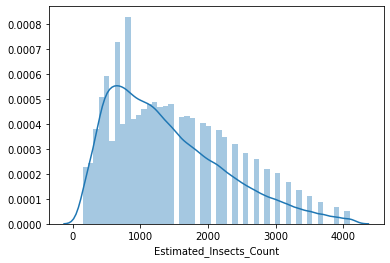

In [14]:
sns.distplot(Orig_df['Estimated_Insects_Count']) #looks like a normal distribution , we do scaling here

## Crop_type

In [15]:
Orig_df['Crop_Type'].value_counts()

0    63589
1    25269
Name: Crop_Type, dtype: int64

## Soil_type

In [16]:
Orig_df['Soil_Type'].value_counts()

0    48124
1    40734
Name: Soil_Type, dtype: int64

### Lets see what happens if we merge the 	Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides) 2 to 1 as the objective is to help the farmer prevent the damage.

In [17]:
Orig_df['Crop_Damage'].value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [18]:
Orig_df['Crop_Damage'].replace(to_replace=2, value=1, inplace=True)

In [19]:
Orig_df['Crop_Damage'].value_counts()

0    74238
1    14620
Name: Crop_Damage, dtype: int64

### Lets see what happens if we merge the Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using) as the objective to figure out how crop is really affected by the pesticides.

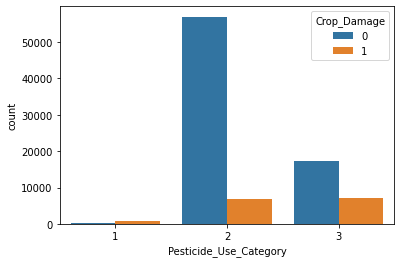

In [20]:
sns.countplot(Orig_df['Pesticide_Use_Category'],hue=Orig_df['Crop_Damage'])

> - Pesticide use has proven to be really helpful to the Farmer as without use of Pesticide, it shows the crop has been more damaged.
> - It also shows the previously used Pesticide were more helpful than the Cureently used ones.As the crops are more alive.but also the counts for previously used Pesticide is so much more so might be we recently changed the crop.

In [21]:
Orig_df['Pesticide_Use_Category'].value_counts()

2    63709
3    24312
1      837
Name: Pesticide_Use_Category, dtype: int64

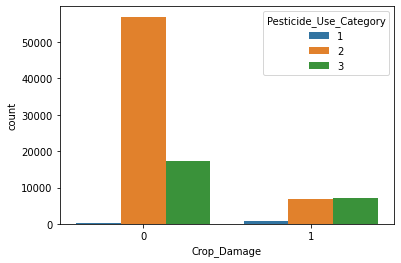

In [22]:
sns.countplot(Orig_df['Crop_Damage'],hue=Orig_df['Pesticide_Use_Category'])

In [23]:
Orig_df[Orig_df['Crop_Damage']==1]['Crop_Damage'].count()/Orig_df[Orig_df['Pesticide_Use_Category']==2]['Pesticide_Use_Category'].count()

0.22948092106295814

In [24]:
Orig_df[Orig_df['Crop_Damage']==1]['Crop_Damage'].count()/Orig_df[Orig_df['Pesticide_Use_Category']==3]['Pesticide_Use_Category'].count()

0.6013491280026324

60% of Crops are damaged with use of Currently Using Pesticide and 22% of Crop were damaged with Previosuly used pesticide.

In [25]:
Orig_df['Pesticide_Use_Category'].replace(to_replace=1, value=2, inplace=True)

In [26]:
Orig_df['Pesticide_Use_Category'].value_counts()

2    64546
3    24312
Name: Pesticide_Use_Category, dtype: int64

## Number_Doses_Week

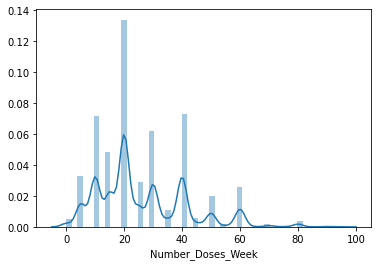

In [27]:
sns.distplot(Orig_df['Number_Doses_Week'])

## Number_Weeks_Used

(array([ 1683.,  6627., 15249., 13610., 15155., 13487.,  6921.,  4991.,
         1850.,   285.]),
 array([ 0. ,  6.7, 13.4, 20.1, 26.8, 33.5, 40.2, 46.9, 53.6, 60.3, 67. ]),
 <a list of 10 Patch objects>)

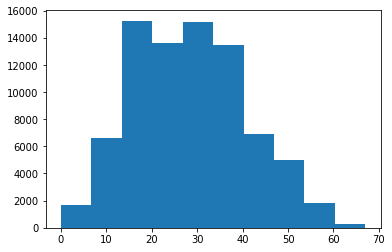

In [28]:
plt.hist(Orig_df['Number_Weeks_Used'])

## Number_Weeks_Quit

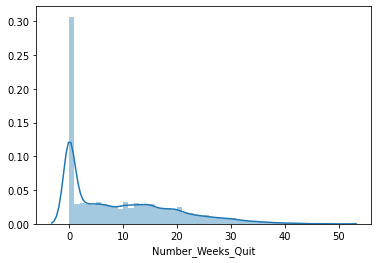

In [29]:
sns.distplot(Orig_df['Number_Weeks_Quit'])

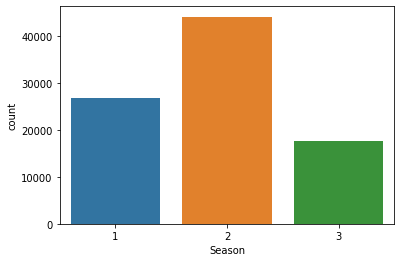

In [30]:
sns.countplot(Orig_df['Season'])

In [31]:
#Orig_df['Total'] = Orig_df['Number_Weeks_Used']+Orig_df['Number_Weeks_Quit']

In [32]:
#plt.hist(Orig_df['Total'])

I will replace the missing values for Number_Weeks_Used =0 when the Number_Doses_Week=0 and Number_Weeks_Quit>75 percentile value i.e. above 16 weeks as we assume its no loner in use else will replace it by its mean value,,

In [33]:
Orig_df[(Orig_df['Number_Weeks_Used'].isna())  & ((Orig_df['Number_Doses_Week']==0) | (Orig_df['Number_Weeks_Quit']>16))].count() #2741 missing will be addressed. 

Estimated_Insects_Count    2274
Crop_Type                  2274
Soil_Type                  2274
Pesticide_Use_Category     2274
Number_Doses_Week          2274
Number_Weeks_Used             0
Number_Weeks_Quit          2274
Season                     2274
Crop_Damage                2274
dtype: int64

In [34]:
Orig_df.loc[(Orig_df['Number_Weeks_Used'].isna())  & ((Orig_df['Number_Doses_Week']==0) | (Orig_df['Number_Weeks_Quit']>16)),'Number_Weeks_Used'] = 0


In [35]:
Orig_df['Number_Weeks_Used'].isna().sum()

6726

In [36]:
Orig_df['Number_Weeks_Used'].fillna(value=Orig_df['Number_Weeks_Used'].mean(),inplace=True)

In [37]:
Orig_df['Number_Weeks_Used'].isna().sum()

0

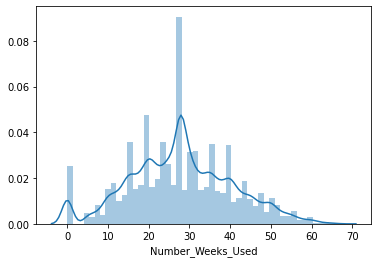

In [38]:
sns.distplot(Orig_df['Number_Weeks_Used'])

So all missing values gone now

In [39]:
Orig_df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,2,0,0.0,0,1,0
1,209,1,0,2,0,0.0,0,2,1
2,257,1,0,2,0,0.0,0,2,1
3,257,1,1,2,0,0.0,0,2,1
4,342,1,0,2,0,0.0,0,2,1


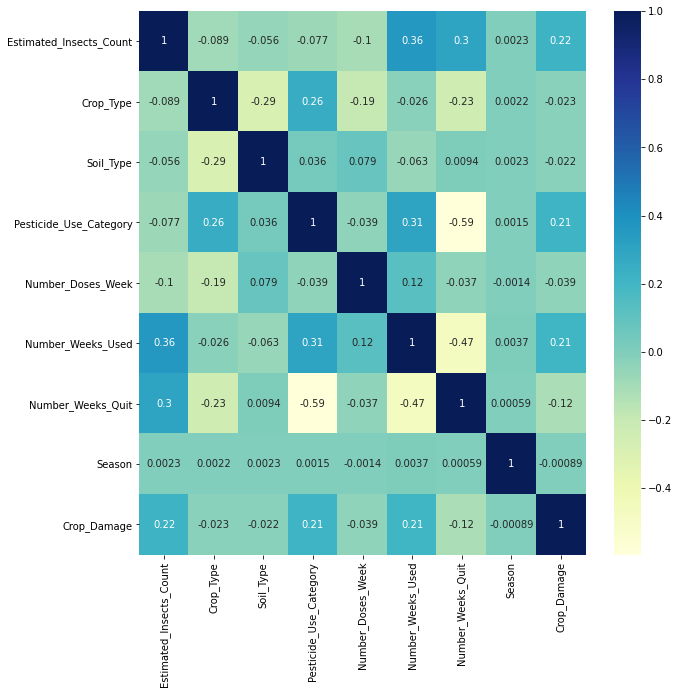

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(Orig_df.corr(),annot=True,cmap='YlGnBu')

We see Crop_Type,Soil_Type,Season have least correlation with the taret column

In [41]:
#Orig_df = pd.get_dummies(Orig_df, columns=['Pesticide_Use_Category','Season'],drop_first=True)

In [42]:
Orig_df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,2,0,0.0,0,1,0
1,209,1,0,2,0,0.0,0,2,1
2,257,1,0,2,0,0.0,0,2,1
3,257,1,1,2,0,0.0,0,2,1
4,342,1,0,2,0,0.0,0,2,1


In [43]:
Orig_df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [44]:
X = Orig_df[['Estimated_Insects_Count',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit']]
y = Orig_df['Crop_Damage']

In [45]:
AV_test_df.drop(columns=['Crop_Type', 'Soil_Type','Season'],inplace=True)

In [46]:
AV_test_df.loc[(AV_test_df['Number_Weeks_Used'].isna())  & ((AV_test_df['Number_Doses_Week']==0) | (AV_test_df['Number_Weeks_Quit']>16)),'Number_Weeks_Used'] = 0


In [47]:
AV_test_df['Number_Weeks_Used'].fillna(value=AV_test_df['Number_Weeks_Used'].mean(),inplace=True)

## train test split

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train_scale = std_scale.fit_transform(X_train)
X_test_scale = std_scale.fit_transform(X_test)
AV_test_scale = std_scale.fit_transform(AV_test_df)

## Modeling

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(random_state=0),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=0),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "Naive Bayes": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=0),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=0),
    "XGBClassifier":XGBClassifier(random_state=0)
    }

In [51]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score
# my_metrics = pd.DataFrame()
# for key, classifier in classifiers.items():
#     classifier.fit(X_train_scale,y_train)
#     y_pred = classifier.predict(X_test_scale)
#     testing_score = round(accuracy_score(y_test,y_pred),3)
#     training_score = round(np.mean((cross_val_score(classifier, X_train_scale, y_train, cv=5))),3)
#     print("Training Score for {model} is {train_score}".format(model=key,train_score=training_score))
#     print("Testing Score for {model} is {test_score}".format(model=key,test_score=testing_score))
#     fit = ""
#     if training_score > testing_score:
#         fit="Good Fit"
#     else:
#         fit="Overfit"
#     metrics_dict = {}
#     metrics_dict = {'Classifier':key,'Test Accuracy':testing_score,'Train Accuracy':training_score,'fit': fit}
#     my_metrics = my_metrics.append(metrics_dict,ignore_index=True)


In [53]:
 #my_metrics

In [54]:
#params = {'max_depth':[3,4,5,6], 'learning_rate':np.arange(0.0,1.0,0.02), 'n_estimators':[100,200,300,400]}

In [55]:
#xgb_model1 = XGBClassifier(random_state=0)

In [56]:
#from sklearn.model_selection import RandomizedSearchCV

In [57]:
#rscv = RandomizedSearchCV(xgb_model1,param_distributions=params,cv=5,scoring='accuracy')

In [58]:
#rscv.fit(X_train_scale,y_train)

In [59]:
#rscv.best_estimator_

In [60]:
#rscv.best_params_

In [61]:
#y_pred_xgb = rscv.best_estimator_.predict(X_test_scale)

In [63]:
#testing_score = round(accuracy_score(y_test,y_pred_xgb),3)
#training_score = round(np.mean((cross_val_score(rscv, X_train_scale, y_train, cv=5))),3)

In [64]:
#y_pred_AV_xgb = rscv.best_estimator_.predict(AV_test_scale)

In [65]:
#result['Crop_Damage'] = y_pred_AV_xgb
#result = result[['ID','Crop_Damage']]

In [66]:
#result.to_csv('AV_Agri_XGB_FE.csv',index=False)

## MLP

In [67]:
import sklearn.neural_network
from sklearn.model_selection import GridSearchCV

In [68]:
parameter_space = {
    'hidden_layer_sizes': [(100, ),(150, ),(200, )],
    'activation': ['sigmoid','tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001,0.01,0.05],
    'learning_rate': ['constant','adaptive']
}

In [69]:
mlp_gs = sklearn.neural_network.MLPClassifier(max_iter=100)
rscv_ml = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
rscv_ml.fit(X_train_scale,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['sigmoid', 'tanh', 'relu'],
                         'alpha': [0.00

In [71]:
y_pred_mlp = rscv_ml.predict(X_test_scale)
y_train_pred = rscv_ml.predict(X_train_scale)

In [72]:
accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred_mlp)
accuracy_train = sklearn.metrics.accuracy_score(y_train, y_train_pred)

In [73]:
print(accuracy_test,accuracy_train)

0.8519581363943282 0.8513490701403933


In [74]:
y_pred_Av = rscv_ml.predict(AV_test_scale)

In [75]:
result_ml=result[['ID']]
result_ml['Crop_Damage'] = y_pred_Av
result_ml = result_ml[['ID','Crop_Damage']] 

In [76]:
result_ml.to_csv('/content/drive/My Drive/AI_ML/AV_Agriculture/AV_Agri_MLP_Drop_columns.csv',index=False)